# Demonstrate functions dealing with em follow-up

In [5]:
import importlib
import photometry_utils
import new_events_utils
importlib.reload(photometry_utils)
importlib.reload(new_events_utils)

<module 'new_events_utils' from '/home/kira/mypy/repos/BBHBot/emfollowup/new_events_utils.py'>

In [2]:
import yaml
with open('../credentials.yaml', 'r') as file:
    credentials = yaml.safe_load(file)
github_token = credentials['github_token']
kowalski_token = credentials['kowalski_token']
kowalski_password = credentials['kowalski_password']
fritz_token = credentials['fritz_token']    
allocation = credentials['allocation']  

## new events

In [4]:
# get events from gracedb that we haven't already saved

from new_events_utils import Gracedb
params = Gracedb().get_new_events()

111 significant superevents in O4b
https://gracedb.ligo.org/api/superevents/S250108ha/files/none
https://gracedb.ligo.org/api/superevents/S241126dm/files/none
https://gracedb.ligo.org/api/superevents/S241104a/files/none
https://gracedb.ligo.org/api/superevents/S240624cd/files/none
https://gracedb.ligo.org/api/superevents/S240423br/files/none
https://gracedb.ligo.org/api/superevents/S240420aw/files/none
0 events (cut 7 low prob bbh events)


In [81]:
# check the trigger status on fritz and check if we handled the event correctly

eventid = [x[0] for x in params]
dateid = [x[12] for x in params]
a90 = [x[16] for x in params]
far = [x[9] for x in params]
mass = [x[22] for x in params]

from new_events_utils import Fritz
trigger_status = Fritz(eventid, dateid, a90, far, mass, allocation, fritz_token).get_trigger_status()

There are currently 102 observation plans generated
S240630t predates trigger
S240629by predates trigger
0 errors, 2 correct, 0 inspect


In [98]:
# compile event information and save to the dictionary of events

from new_events import NewEventsToDict
df = NewEventsToDict(params, trigger_status, notebook=True).save_data()
df

New events saved to dictionary.


,GW MJD,90% Area (deg2),50% Area (deg2),Distance (Gpc),FAR (years/FA),Mass (M_sol),gcnids,trigger,plan time,plan probability,plan start,cadence
graceids,,,,,,,,,,,,
S240630t,60491,670,188,3.16,3200,116,2024-06-30T10:17:03,predates trigger,,,,
S240629by,60491,66,10,1.17,100,47,2024-06-29T14:52:57,predates trigger,,,,


In [139]:
skymap_str = [x[18] for x in params]
zmin = [x[19] for x in params]
zmax = [x[20] for x in params]

from new_events import KowalskiCrossmatch
crossmatch = KowalskiCrossmatch(kowalski_password, eventid, skymap_str, dateid, zmin, zmax)
new_events=crossmatch.check_events_to_crossmatch()
matches = crossmatch.get_crossmatches()

0 events are missing crossmatch: []
3584 CATNorth AGN found in localization volume for S240630t
106 CATNorth AGN found in localization volume for S240629by
2827 Quaia AGN found in localization volume for S240630t
50 Quaia AGN found in localization volume for S240629by
S240630t already in dictionary
S240629by already in dictionary


22 O4b events with FAR > 10 and mass > 60 and area < 1000 sq deg


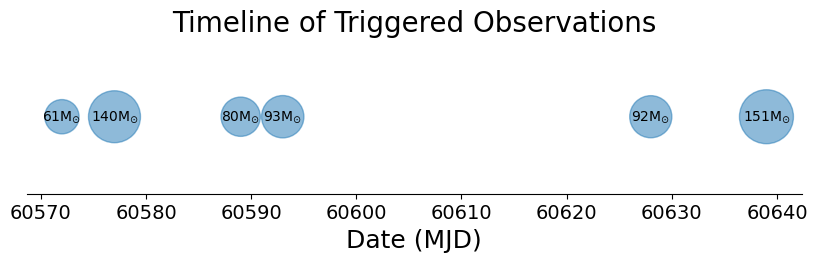

In [145]:
from new_events import PushEventsPublic
df, priority, trigger_df, error_triggers = PushEventsPublic('test', push=False, verbose=True).format_and_push()

In [148]:
trigger_df

,graceids,GW MJD,90% Area (deg2),50% Area (deg2),Distance (Gpc),FAR (years/FA),Mass (M_sol),gcnids,time,probability,start,cadence,comments
0,[S241125n](https://gracedb.ligo.org/superevent...,60639,1956,526,4.47,3.330000e+01,151,[2024-11-25T01:01:17](https://fritz.science/gc...,900.0,0.50,,,Swift/Bat coincident detection
1,[S241114y](https://gracedb.ligo.org/superevent...,60628,152,43,2.51,3.500000e+05,92,[2024-11-14T02:47:12](https://fritz.science/gc...,1140.0,0.86,2024-11-15T01:42:44.719,"[2024.11.22, 2024.11.29, 2024.12.06, 2024.12.1...",
2,[S241009em](https://gracedb.ligo.org/supereven...,60593,25,7,2.78,1.120000e+01,93,[2024-10-09T22:04:56](https://fritz.science/gc...,120.0,0.76,2024-10-12T09:00:53.912,"[2024.10.19, 2024.10.26, 2024.11.02, 2024.11.0...",
3,[S241006k](https://gracedb.ligo.org/superevent...,60589,263,51,1.90,5.300000e+33,80,[2024-10-06T01:53:34](https://fritz.science/gc...,1260.0,0.91,2024-10-06T02:20:20.960,"[2024.10.13, 2024.10.20, 2024.10.27, 2024.11.0...",
4,[S240923ct](https://gracedb.ligo.org/supereven...,60577,216,45,4.02,4.100000e+07,140,[2024-09-23T20:40:06](https://fritz.science/gc...,720.0,0.73,2024-09-24T02:36:34.228,"[2024.10.01, 2024.10.08, 2024.10.15, 2024.10.2...",
5,[S240919bn](https://gracedb.ligo.org/supereven...,60572,16,4,1.71,7.900000e+11,61,[2024-09-19T06:15:59](https://fritz.science/gc...,180.0,0.90,2024-09-19T06:21:30.794,"[2024.09.26, 2024.10.03, 2024.10.10, 2024.10.1...",


# photometry

In [132]:
import importlib
import photometry_utils
importlib.reload(photometry_utils)

<module 'photometry_utils' from '/home/kira/mypy/repos/BBHBot/emfollowup/photometry_utils.py'>

In [6]:
# check photometry status

from photometry_utils import PhotometryStatus
PhotometryStatus('O4b').show_status()

76 / 98 events in O4b are not priority


,ID,Date last zfps,Status,Trigger
0,S240630t,,needs ZFPS,
1,S250118dp,2025-02-11 18:14:52.995,update ZFPS,
2,S250119ag,2025-02-11 18:19:05.806,update ZFPS,
3,S250109f,2025-01-24 21:21:42.071,update ZFPS,
4,S250108eo,2025-01-24 21:18:05.241,update ZFPS,
5,S241210cw,2025-01-24 23:32:19.070,update ZFPS,
6,S241129aa,2025-01-24 23:35:29.537,update ZFPS,
7,S241130n,2025-01-24 23:38:29.530,update ZFPS,
8,S241114y,2025-01-24 21:04:56.625,update ZFPS,True
9,S241009em,NA,no AGN,True


In [133]:
from photometry_utils import PhotometryCoords
ra, dec, jd = PhotometryCoords(action='update', graceid='S241114y', catalog=['catnorth'], verbose=True).get_photometry_coords()

last photometry request for S241114y was on 2025-01-24 21:04:56.625
Found saved photometry for 3819 / 3825 coords crossmatched
3819 coords are valid for update photometry
After batching dates with window size 60, created 4 batches
Fewer than 1500 AGN - submit in one batch
Fewer than 1500 AGN - submit in one batch
Fewer than 1500 AGN - submit in one batch
More than 1500 AGN - submit in 3 batches
After batching for ZFPS, retrieved 3819 objects in 6 batches


In [134]:
from photometry_utils import GetPhotometry

#GetPhotometry(graceid='S241114y', ra, dec, jd)

In [ ]:
from photometry_utils import SavePhotometry

#SavePhotometry(graceid='S241114y', batch_codes=['11127'], action='update').save_photometry()

## flares